Note: Parts of this homework might be quite challenging as it may not be obvious how to even search for a possible solution. Feel free to collaborate with your classmates to solve these questions.

**1**. Using `requests`, read text from from 

`https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names`
    
and write a regular expression using `re` that returns the following list

```python
['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class']
```

In [1]:
import requests

x = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names')

In [2]:
import re

ls = re.findall('sepal.*cm|petal.*cm',x.text)+[re.search('class',x.text)[0]]
ls

['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class']

**2**. Using `pandas`, create a DataFrame which looks like the image below (but with all rows) from

`https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'`

and the columns variable created in the last question.

<img src="ex4_q2.png" alt="df" width="400"/>

In [3]:
import pandas as pd
cols = [s.replace(" ","_") for s in ls]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.columns = cols
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**3**. Modify the DataFrame so that `iris` is in a column called `genus` and `setosa` etc is in a column named `species` and remove the `class` column.

In [4]:
df[["genus","species"]] = df["class"].str.split("-",expand=True)
df = df.drop('class',axis=1)

In [5]:
df.dropna(inplace=True)

In [6]:
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,genus,species
0,4.9,3.0,1.4,0.2,Iris,setosa
1,4.7,3.2,1.3,0.2,Iris,setosa
2,4.6,3.1,1.5,0.2,Iris,setosa
3,5.0,3.6,1.4,0.2,Iris,setosa
4,5.4,3.9,1.7,0.4,Iris,setosa
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris,virginica
145,6.3,2.5,5.0,1.9,Iris,virginica
146,6.5,3.0,5.2,2.0,Iris,virginica
147,6.2,3.4,5.4,2.3,Iris,virginica


In [7]:
df.drop(['genus',"species"],axis=1).columns[0]

'sepal_length_in_cm'

**4**. Using `seaborn`, generate this plot from the DataFrame created in Q3.

<img src="ex4_q4.png" alt="plot" width="400"/>

In [8]:
numeric = df.columns[0:4]
df = df.astype({numeric[0]:'float',numeric[1]:"float",numeric[2]:"float",numeric[3]:"float"})

In [8]:
import matplotlib.pyplot as plt

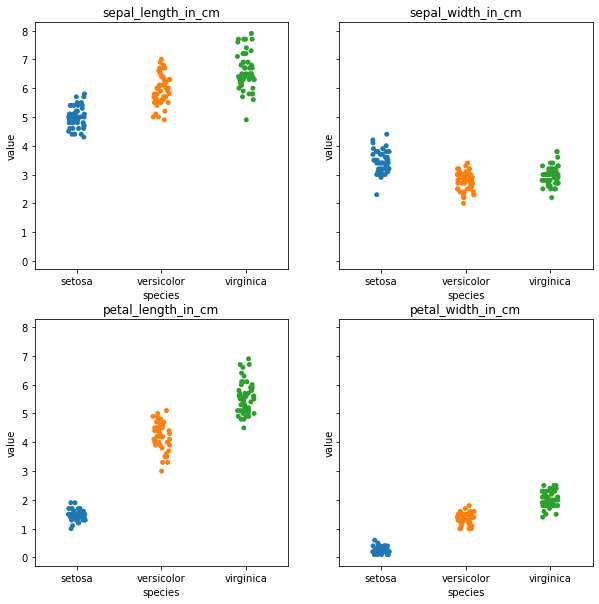

In [9]:
import seaborn as sns
fig, ax = plt.subplots(2,2,figsize=(10,10),sharey=True)
j=0
for i, value in enumerate(df.columns[0:4]):
    if i>1:
        j=1
    if i>1:
        i -= 2
    sns.stripplot(x='species',y=value,data=df, ax=ax[j,i])
    ax[j,i].set_ylabel("value")
    ax[j,i].set_title(value)

**5**. Using `joypy`, create the following plot from the `iris` DataFrame from Q2. You may have to pip install `joypy` first.

<img src="ex4_q5.png" alt="plot" width="400"/>

In [10]:
import joypy

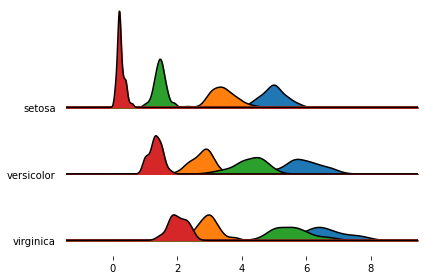

In [11]:
fig, ax = joypy.joyplot(df, by="species")